In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
pwd

'C:\\Users\\AMAN'

In [3]:
 cd "Desktop/quality of wine/"

C:\Users\AMAN\Desktop\quality of wine


In [4]:
df=pd.read_csv('wineQualityReds.csv')

In [5]:
df.head(10)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [8]:
df.shape

(1599, 13)

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

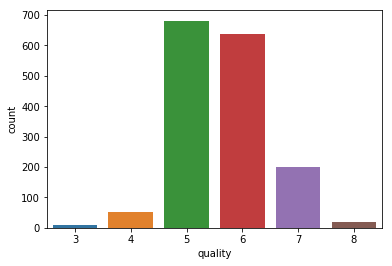

In [10]:
sns.countplot(x='quality',data=df)

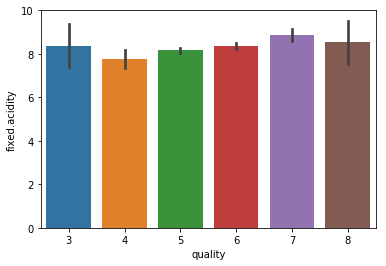

In [11]:
sns.barplot(x='quality',y='fixed.acidity',data =df)

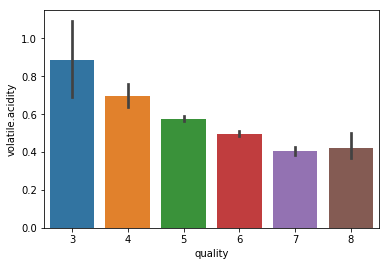

In [12]:
sns.barplot(x='quality',y='volatile.acidity',data =df)

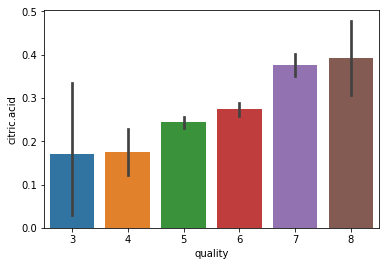

In [13]:
sns.barplot(x='quality',y='citric.acid',data =df)

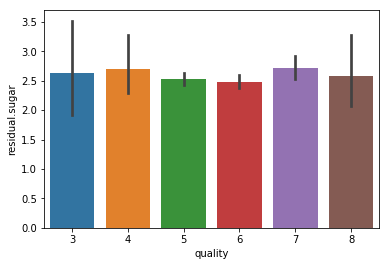

In [14]:
sns.barplot(x='quality',y='residual.sugar',data =df)

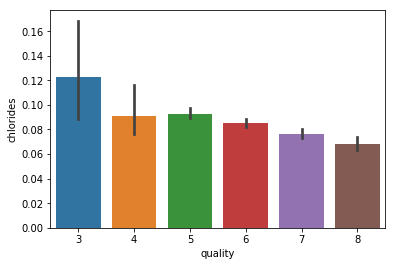

In [15]:
sns.barplot(x='quality',y='chlorides',data =df)

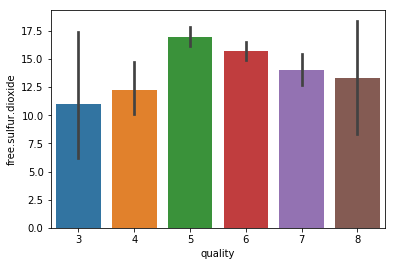

In [16]:
sns.barplot(x='quality',y='free.sulfur.dioxide',data =df)

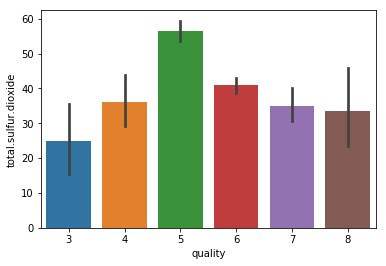

In [17]:
sns.barplot(x='quality',y='total.sulfur.dioxide',data =df)

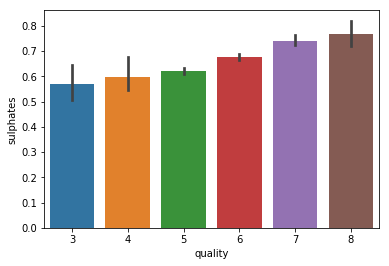

In [18]:
sns.barplot(x='quality',y='sulphates',data =df)

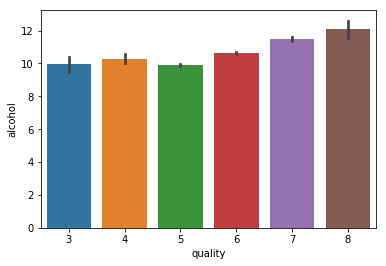

In [19]:
sns.barplot(x='quality',y='alcohol',data =df)

In [20]:
bins=(2,6.5,8)
group_names=['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=group_names)

In [21]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
lb=LabelEncoder()

In [22]:
df.quality=lb.fit_transform(df.quality)

In [23]:
df.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

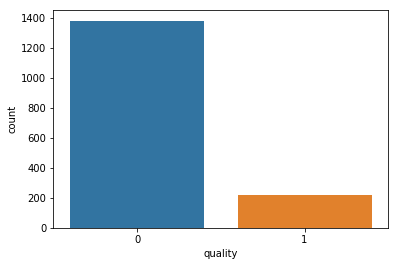

In [24]:
sns.countplot(df.quality,data=df)

In [25]:
y = df['quality']
X = df.drop('quality',axis=1)

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [29]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [30]:
#Let's see how our model performed
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.69      0.38      0.49        47

avg / total       0.87      0.88      0.87       320



In [31]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 29  18]]


In [32]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [33]:
#Let's see how our model performed
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.69      0.38      0.49        47

avg / total       0.87      0.88      0.87       320



In [34]:
print(confusion_matrix(y_test, pred_sgd))

[[244  29]
 [ 26  21]]


In [35]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [36]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.67      0.26      0.37        47

avg / total       0.85      0.87      0.85       320



In [38]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90       273
          1       0.37      0.21      0.27        47

avg / total       0.80      0.83      0.81       320



In [39]:
print(confusion_matrix(y_test, pred_sgd))

[[256  17]
 [ 37  10]]


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X.head(5)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


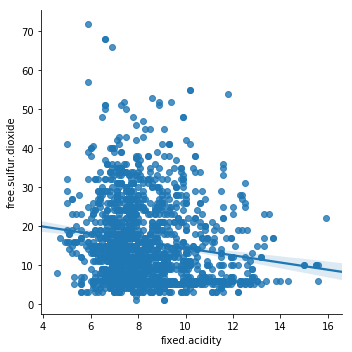

In [48]:
sns.lmplot(x='fixed.acidity',y='free.sulfur.dioxide',data=df)

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [50]:
 SVC()
param={'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4], 
       'kernel':['linear', 'rbf'],
      'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]}

In [51]:
# can use for KNN and other (it's find the appropriat val for )
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [52]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [53]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

In [54]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95       273
          1       1.00      0.36      0.53        47

avg / total       0.92      0.91      0.89       320



In [55]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.913238188976378

In [ ]:
#thanks